<a href="https://colab.research.google.com/github/SerafimNascimento/TCCExtensaoIMDDataVisSerafim/blob/main/TCC_Curso_de_Extens%C3%A3o_Serafim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTEGRA SCHOOL 2021**
## Curso: **Introdução a Visualização de Dados com Python**
Professor: **Carlos Artur Guimarães**

# **Trabalho de Conclusão de Curso**
**Título:** Análise da Evolução da Taxa de Pobreza no Brasil de 2006 a 2013 \\
**Componente**: *Serafim do Nascimento Junior* \\

<ul type="square">
  <li> <strong>Problemática:</strong> A pobreza no Brasil é um problema de difícil solução e que atinge uma boa parte da população. A taxa de pobreza é a relação da quantidade de pessoas (dentro de um determinado grupo de idade) pela qual a renda está abaixo da linha da pobreza e é dada pela metade da mediana da renda familiar de toda a população. A taxa de pobreza pode ser medida por diferentes grupos de idade: pobreza infantil (0-17 anos de idade); pobreza em idade produtiva (18-65 anos de idade); e pobreza entre idosos (66 anos ou acima dessa idade). </li>
  <li> <strong>O que é:</strong> Histórico da diminuição da pobreza de 2006 a 2013. </li>
  <li> <strong>Fonte de Dados:</strong> <i>Organização para a Cooperação e Desenvolvimento Econômico</i> (OCDE). Link para obtenção da base de dados: <a>https://data.oecd.org/inequality/poverty-rate.htm#indicator-chart</a></li>
  <li> <strong>Área da ONU:</strong> <i>Erradicação da Pobreza</i> (1ª área) </li>
  <li> <strong>Objetivo:</strong> <i>Acabar com a pobreza em todas as suas formas, em todos os lugares</i>. </li>
</ul>

#**Obtenção dos Dados**

In [65]:
# Importações importantes
import pandas as pd # Biblioteca Pandas
import matplotlib.pyplot as plt # Biblioteca matplotlib.pyplot
import plotly.express as px # Biblioteca plotly.express
import seaborn as sns # Biblioteca seaborn

In [67]:
# Lendo a base de dados
# O nome real da base de dados era DP_LIVE_15062021040908747. Entretanto, eu
#decidi alterar para fazer mais sentido com o trabalho e, também, com a leitura
#do arquivo.
paises = pd.read_csv("/content/Taxa_de_Pobreza_no_Mundo.csv")
#Apresentando a base de dados
paises

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,POVERTY,0_17,RT,A,2012,0.129,NaN
1,AUS,POVERTY,0_17,RT,A,2014,0.130,NaN
2,AUS,POVERTY,0_17,RT,A,2016,0.125,NaN
3,AUS,POVERTY,0_17,RT,A,2018,0.133,NaN
4,AUS,POVERTY,TOT,RT,A,2012,0.140,NaN
...,...,...,...,...,...,...,...,...
1771,ROU,POVERTY,66MORE,RT,A,2014,0.144,NaN
1772,ROU,POVERTY,66MORE,RT,A,2015,0.148,NaN
1773,ROU,POVERTY,66MORE,RT,A,2016,0.161,NaN
1774,ROU,POVERTY,66MORE,RT,A,2017,0.185,NaN


#**Limpeza dos Dados**
Traduzida do Inglês *scrubbing data*.

In [68]:
#Analisando a base de dados completa para realização da limpeza de dados
paises

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,POVERTY,0_17,RT,A,2012,0.129,NaN
1,AUS,POVERTY,0_17,RT,A,2014,0.130,NaN
2,AUS,POVERTY,0_17,RT,A,2016,0.125,NaN
3,AUS,POVERTY,0_17,RT,A,2018,0.133,NaN
4,AUS,POVERTY,TOT,RT,A,2012,0.140,NaN
...,...,...,...,...,...,...,...,...
1771,ROU,POVERTY,66MORE,RT,A,2014,0.144,NaN
1772,ROU,POVERTY,66MORE,RT,A,2015,0.148,NaN
1773,ROU,POVERTY,66MORE,RT,A,2016,0.161,NaN
1774,ROU,POVERTY,66MORE,RT,A,2017,0.185,NaN


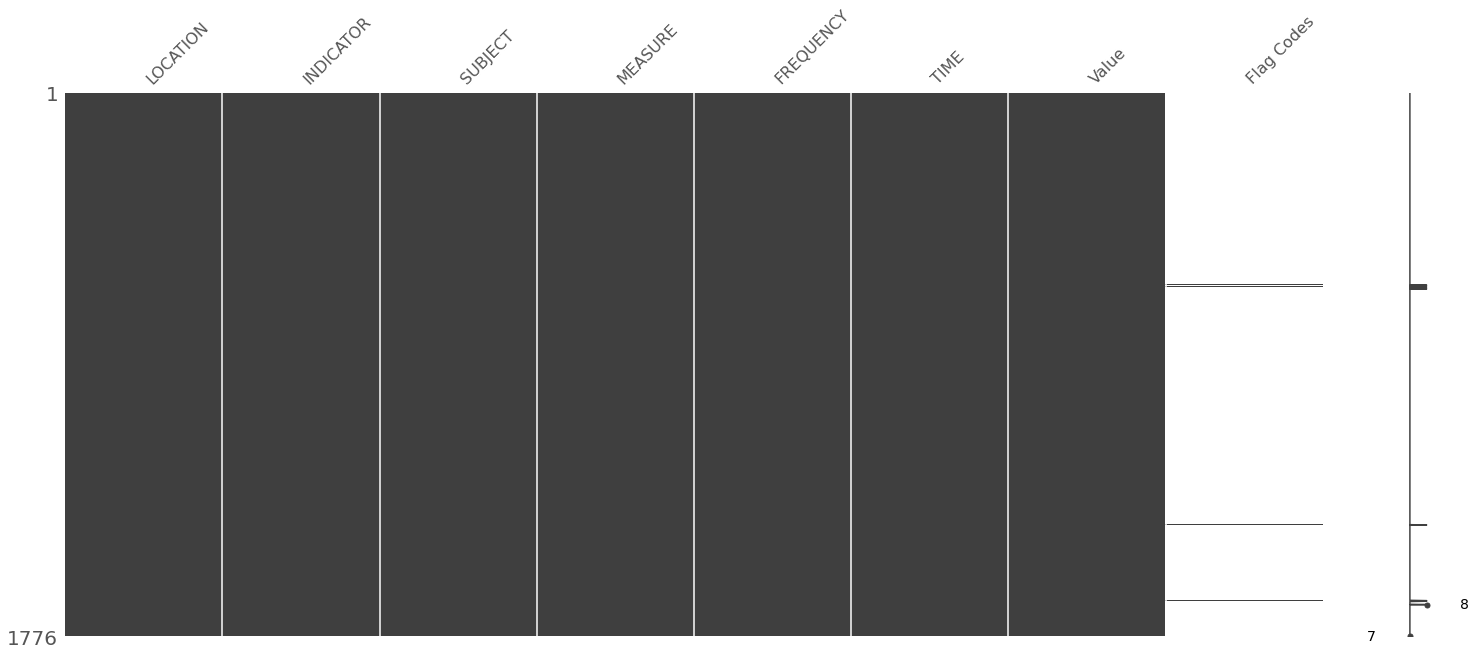

In [69]:
# Importação da biblioteca Missingno para auxiliar na limpeza dos dados.
# A bibliteca permite a visualização de colunas com ausência de valores.
import missingno as msngno
msngno.matrix(paises)
# A função matrix torna possível a plotagem do gráfico apresentado abaixo.
# Os espaços em branco do gráfico indicam valores ausentes na base de dados
# Por outro lado, os espaços na cor cinza escuro indicam que há valores
#na base nos campos das colunas da base de dados.
# Como podemos observar no gráfico gerado, a coluna Flag Codes possui
#pouquíssimos valores. Sendo assim, podemos desconsiderar a coluna Flags Codes,
#pois não haverá interferência na análise que eu quero fazer.

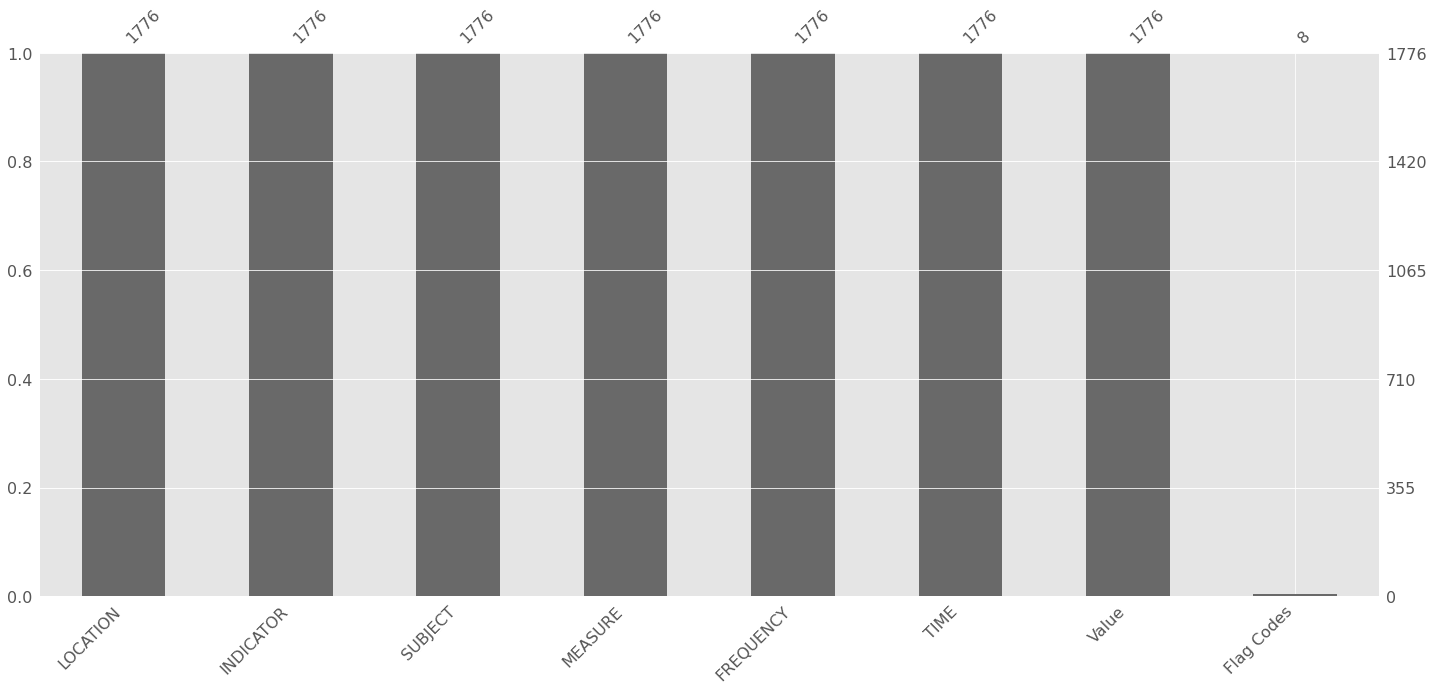

In [70]:
msngno.bar(paises)
# A função bar também pode ser utilizada para visualizar colunas com valores
#ausentes. Tal função apresenta um gráfico de barras com a quantidade de valores
#não nulos em cada coluna, especificamente, acima de cada barra.
# Dessa maneira, podemos confirmar o que já identificamos anteriormente: a
#coluna Flag Codes, diferente das demais, possui muitos valores nulos devido
#a função bar ter retornado que ela tem só 8 valores não nulos. As outras
#colunas da base possuem 1776 valores não nulos, isto é, estão completas.

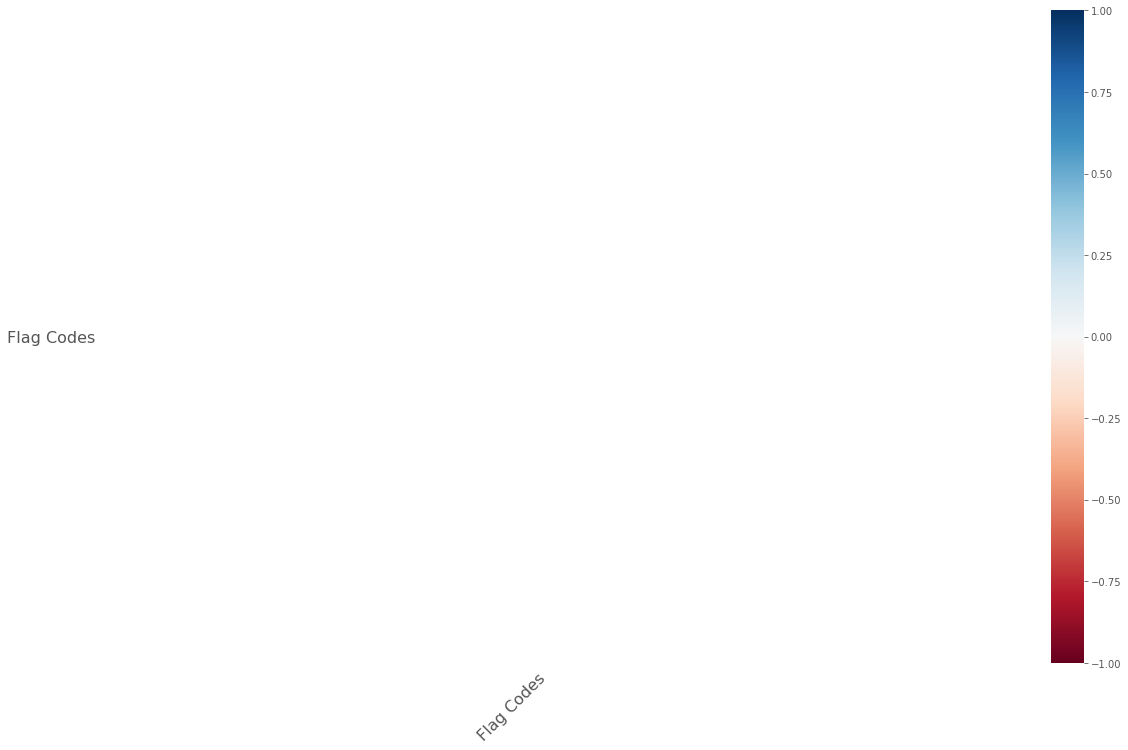

In [71]:
msngno.heatmap(paises)

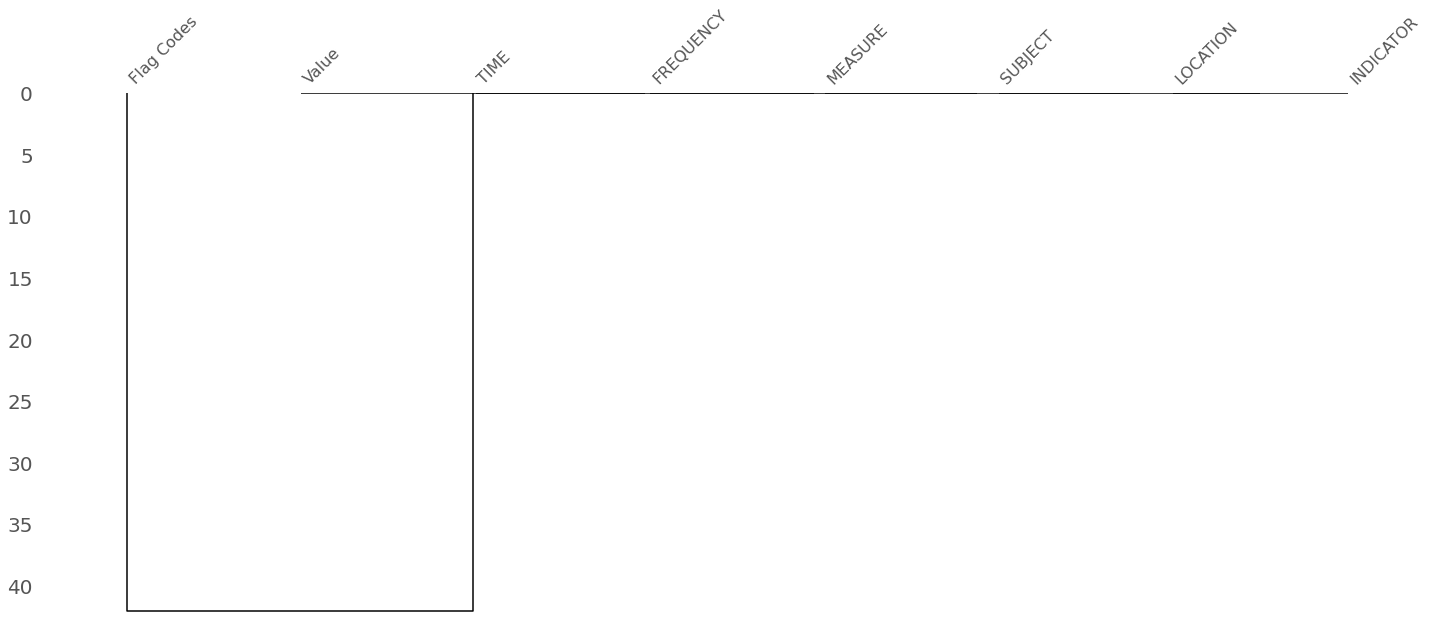

In [72]:
msngno.dendrogram(paises)

In [73]:
# Após ter sido identificado que quase 100% dos valores da coluna Flag Codes
#são nulos, essa coluna será removida pois ela não será necessária para a
#análise que quero fazer com a base de dados.
paises = paises.drop('Flag Codes', axis = 1)
# Coloquei axis = 1 porque quero remover um coluna.
# Se eu quisesse remover uma linha, deveria colocar axis = 0.


In [74]:
# Apresento novamente a base de dados referente ao Brasil para mostrar que
#a coluna Flag Codes foi removida.
paises

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,AUS,POVERTY,0_17,RT,A,2012,0.129
1,AUS,POVERTY,0_17,RT,A,2014,0.130
2,AUS,POVERTY,0_17,RT,A,2016,0.125
3,AUS,POVERTY,0_17,RT,A,2018,0.133
4,AUS,POVERTY,TOT,RT,A,2012,0.140
...,...,...,...,...,...,...,...
1771,ROU,POVERTY,66MORE,RT,A,2014,0.144
1772,ROU,POVERTY,66MORE,RT,A,2015,0.148
1773,ROU,POVERTY,66MORE,RT,A,2016,0.161
1774,ROU,POVERTY,66MORE,RT,A,2017,0.185


In [75]:
# Como precisarei somente analisar os dados do Brasil para a minha pesquisa, eu
#criei uma base de dados somente para esse país e, dessa forma, está concluída
#a limpeza dos dados.
pais_brasil = paises.loc[paises['LOCATION']=='BRA']
pais_brasil

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
1592,BRA,POVERTY,0_17,RT,A,2006,0.312
1593,BRA,POVERTY,0_17,RT,A,2009,0.307
1594,BRA,POVERTY,0_17,RT,A,2011,0.308
1595,BRA,POVERTY,0_17,RT,A,2013,0.301
1596,BRA,POVERTY,TOT,RT,A,2006,0.212
1597,BRA,POVERTY,TOT,RT,A,2009,0.206
1598,BRA,POVERTY,TOT,RT,A,2011,0.209
1599,BRA,POVERTY,TOT,RT,A,2013,0.200
1600,BRA,POVERTY,18_65,RT,A,2006,0.176
1601,BRA,POVERTY,18_65,RT,A,2009,0.174


#**Exploração dos Dados**

In [76]:
pais_brasil.shape
# Retorna quantas linha e quantas colunas a tabela pais_brasil tem.
# O resultado terá que ser (16,7), isto é, 16 linhas e 7 colunas.
# A base contém 16 registros referentes ao Brasil.

(16, 7)

In [77]:
qtdLinhas = pais_brasil['LOCATION'].count()
# O código acima retorna a quantidade de linhas da tabela pais_brasil.
# Decidi criar esse código para explorar melhor os dados da tabela com
#a função head.
# Apresentando a tabela novamente.
pais_brasil.head(qtdLinhas)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
1592,BRA,POVERTY,0_17,RT,A,2006,0.312
1593,BRA,POVERTY,0_17,RT,A,2009,0.307
1594,BRA,POVERTY,0_17,RT,A,2011,0.308
1595,BRA,POVERTY,0_17,RT,A,2013,0.301
1596,BRA,POVERTY,TOT,RT,A,2006,0.212
1597,BRA,POVERTY,TOT,RT,A,2009,0.206
1598,BRA,POVERTY,TOT,RT,A,2011,0.209
1599,BRA,POVERTY,TOT,RT,A,2013,0.200
1600,BRA,POVERTY,18_65,RT,A,2006,0.176
1601,BRA,POVERTY,18_65,RT,A,2009,0.174


In [78]:
pais_brasil.describe()
# Só foi possível realizar os cálculos da função describe do tempo com o valor
#refente a taxa de pobreza, pois são os únicos atributos numéricos
#da base de dados. 
#Nem todos os cálculos para o tempo precisam ser considerados.

,TIME,Value
count,16.00000,16.000000
mean,2009.75000,0.191000
std,2.67083,0.085756
min,2006.00000,0.067000
25%,2008.25000,0.150000
50%,2010.00000,0.190000
75%,2011.50000,0.234250
max,2013.00000,0.312000


In [79]:
pais_brasil.corr()
# Só foi possível fazer a correlação do tempo com o valor
#refente a taxa de pobreza, pois são os únicos atributos
#numéricos da base de dados

,TIME,Value
TIME,1.000000,-0.009605
Value,-0.009605,1.000000


In [80]:
# Separando por faixas etárias
# Cidadãos de 0 a 17 Anos de Idade
ft_0_17 = pais_brasil.loc[pais_brasil['SUBJECT']=='0_17']
ft_0_17

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
1592,BRA,POVERTY,0_17,RT,A,2006,0.312
1593,BRA,POVERTY,0_17,RT,A,2009,0.307
1594,BRA,POVERTY,0_17,RT,A,2011,0.308
1595,BRA,POVERTY,0_17,RT,A,2013,0.301


In [81]:
# Separando por faixas etárias
# Cidadãos de 18 a 65 Anos de Idade
ft_18_65 = pais_brasil.loc[pais_brasil['SUBJECT']=='18_65']
ft_18_65

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
1600,BRA,POVERTY,18_65,RT,A,2006,0.176
1601,BRA,POVERTY,18_65,RT,A,2009,0.174
1602,BRA,POVERTY,18_65,RT,A,2011,0.180
1603,BRA,POVERTY,18_65,RT,A,2013,0.173


In [82]:
# Separando por faixas etárias
# Cidadãos com no mínimo 66 Anos de Idade
ft_66MORE = pais_brasil.loc[pais_brasil['SUBJECT']=='66MORE']
ft_66MORE

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
1604,BRA,POVERTY,66MORE,RT,A,2006,0.067
1605,BRA,POVERTY,66MORE,RT,A,2009,0.073
1606,BRA,POVERTY,66MORE,RT,A,2011,0.081
1607,BRA,POVERTY,66MORE,RT,A,2013,0.077


In [83]:
# Separando por faixas etárias
# População Brasileira
ft_TOT = pais_brasil.loc[pais_brasil['SUBJECT']=='TOT']
ft_TOT

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
1596,BRA,POVERTY,TOT,RT,A,2006,0.212
1597,BRA,POVERTY,TOT,RT,A,2009,0.206
1598,BRA,POVERTY,TOT,RT,A,2011,0.209
1599,BRA,POVERTY,TOT,RT,A,2013,0.200


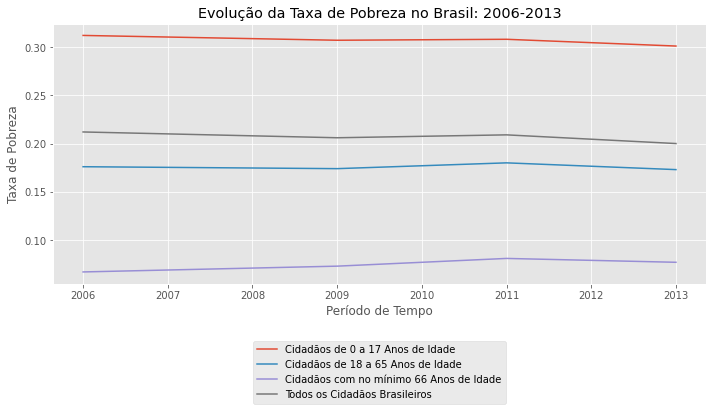

In [84]:
#Gráfico de Linhas
plt.style.use("ggplot")
plt.figure(figsize = (10, 6))

x = [2006,2009,2011,2013]
y1 = ft_0_17['Value']
y2 = ft_18_65['Value']
y3 = ft_66MORE['Value']
y4 = ft_TOT['Value']

plt.plot(x, y1, label="Cidadãos de 0 a 17 Anos de Idade")
plt.plot(x, y2, label="Cidadãos de 18 a 65 Anos de Idade")
plt.plot(x, y3, label="Cidadãos com no mínimo 66 Anos de Idade")
plt.plot(x, y4, label="Todos os Cidadãos Brasileiros")
plt.plot()

plt.xlabel("Período de Tempo")
plt.ylabel("Taxa de Pobreza")
plt.title("Evolução da Taxa de Pobreza no Brasil: 2006-2013")
#plt.legend(loc=0)
#O comando abaixo serve para melhorar a legenda do gráfico
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center')
plt.tight_layout()
#plt.xticks(rotation=90)

plt.show()

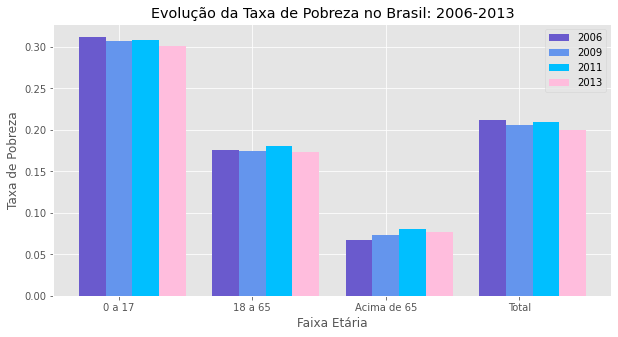

In [98]:
#Gráfico de Barras
import numpy as np

#definição da largura das barras
barWidth = 0.2

faixa017 = [y1[1592],y2[1600],y3[1604],y4[1596]]
faixa1865 = [y1[1593],y2[1601],y3[1605],y4[1597]]
faixa66MORE = [y1[1594],y2[1602],y3[1606],y4[1598]]
faixaTot = [y1[1595],y2[1603],y3[1607],y4[1599]]

#Aumentando o gráfico
plt.figure(figsize=(10,5))

#Definição da posição das barras
bar1 = np.arange(len(faixa017)) #y1
bar2 = [x1 + barWidth for x1 in bar1]
bar3 = [x1 + barWidth for x1 in bar2]
bar4 = [x1 + barWidth for x1 in bar3]

#Criação das barras
plt.bar(bar1,faixa017,color='#6A5ACD',width=barWidth,label='2006')
plt.bar(bar2,faixa1865,color='#6495ED',width=barWidth,label='2009')
plt.bar(bar3,faixa66MORE,color='#00BFFF',width=barWidth,label='2011')
plt.bar(bar4,faixaTot,color='#FFBDDD',width=barWidth,label='2013')

#Adição de legendas as barras
plt.xlabel('Faixa Etária')
plt.xticks([r + barWidth for r in range(len(y1))],['0 a 17','18 a 65','Acima de 65','Total'])
plt.ylabel('Taxa de Pobreza')
plt.title('Evolução da Taxa de Pobreza no Brasil: 2006-2013')

plt.legend()
plt.show()

In [102]:
# Calculando a média da taxa de pobreza ao longo do período para os
#cidadãos com idade de 0 a 17 anos de idade.
med_0_17 = np.mean(y1)
med_0_17

0.307

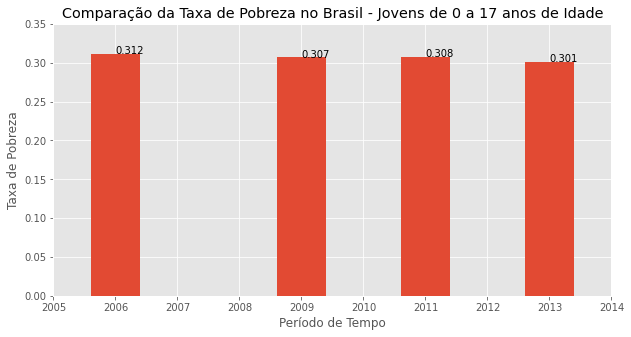

In [121]:
anosMed = [2006,2009,2011,2013]
comp_y1 = [y1[1592], y1[1593], y1[1594], y1[1595]]

plt.figure(figsize=[10,5])
plt.bar(anosMed,comp_y1)
plt.title("Comparação da Taxa de Pobreza no Brasil - Jovens de 0 a 17 anos de Idade")
plt.xlabel("Período de Tempo")
plt.ylabel("Taxa de Pobreza")
plt.axis([2005, 2014, 0, 0.35])
#O código abaixo faz o seguinte:
#Impede que os valores das populações sejam escritos em notação científica.
plt.ticklabel_format(style='plain', axis='y') 
plt.grid(True)
#plt.box(False)

# Colocando os valores das taxas anuais acima de cada barra
for i in range(len(comp_y1)): 
  plt.annotate(str(comp_y1[i]), xy=(anosMed[i],comp_y1[i]))

plt.show()
#Analisando o gráfico abaixo podemos perceber que no último ano pelo qual a
#taxa de pobreza foi medida, ela ficou abaixo da média de 0.307 calculada
#anteriormente. Podemos concluir que houve um esforço para tentar diminuir
#a taxa de pobreza nessa faixa etária.


In [103]:
# Calculando a média da taxa de pobreza ao longo do período para os
#cidadãos com idade de 18 a 65 anos de idade.
med_18_65 = np.mean(y2)
med_18_65

0.17575000000000002

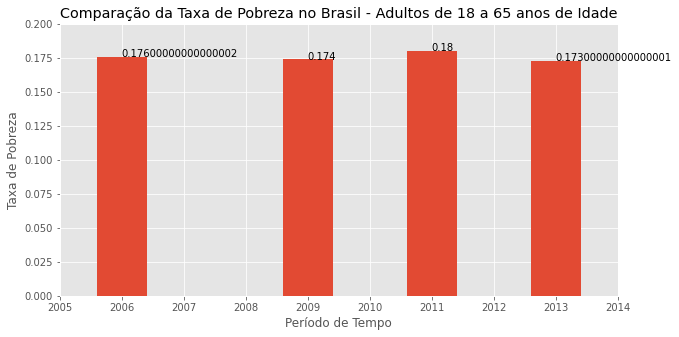

In [125]:
#Como anosMed já foi definido anteriormente, então desconsiderei aqui.
#anosMed = [2006,2009,2011,2013]
comp_y2 = [y2[1600], y2[1601], y2[1602], y2[1603]]

plt.figure(figsize=[10,5])
plt.bar(anosMed,comp_y2)
plt.title("Comparação da Taxa de Pobreza no Brasil - Adultos de 18 a 65 anos de Idade")
plt.xlabel("Período de Tempo")
plt.ylabel("Taxa de Pobreza")
plt.axis([2005, 2014, 0, 0.2])
#O código abaixo faz o seguinte:
#Impede que os valores das populações sejam escritos em notação científica.
plt.ticklabel_format(style='plain', axis='y') 
plt.grid(True)
#plt.box(False)

# Colocando os valores das taxas anuais acima de cada barra
for i in range(len(comp_y2)): 
  plt.annotate(str(comp_y2[i]), xy=(anosMed[i],comp_y2[i]))

plt.show()
#Analisando o gráfico abaixo podemos perceber que no último ano pelo qual a
#taxa de pobreza foi medida, ela ficou abaixo da média de 0.17575 calculada
#anteriormente. Podemos concluir que também houve um esforço para tentar
#diminuir a taxa de pobreza nessa faixa etária.


In [104]:
# Calculando a média da taxa de pobreza ao longo do período para os
#cidadãos com idade de no mínimo 66 anos de idade.
med_66_MORE = np.mean(y3)
med_66_MORE

0.07450000000000001

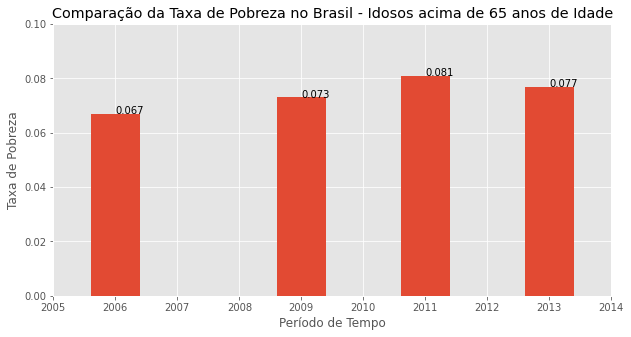

In [129]:
#Como anosMed já foi definido anteriormente, então desconsiderei aqui.
#anosMed = [2006,2009,2011,2013]
comp_y3 = [y3[1604], y3[1605], y3[1606], y3[1607]]

plt.figure(figsize=[10,5])
plt.bar(anosMed,comp_y3)
plt.title("Comparação da Taxa de Pobreza no Brasil - Idosos acima de 65 anos de Idade")
plt.xlabel("Período de Tempo")
plt.ylabel("Taxa de Pobreza")
plt.axis([2005, 2014, 0, 0.1])
#O código abaixo faz o seguinte:
#Impede que os valores das populações sejam escritos em notação científica.
plt.ticklabel_format(style='plain', axis='y') 
plt.grid(True)
#plt.box(False)

# Colocando os valores das taxas anuais acima de cada barra
for i in range(len(comp_y3)): 
  plt.annotate(str(comp_y3[i]), xy=(anosMed[i],comp_y3[i]))

plt.show()
#Analisando o gráfico abaixo podemos perceber que no último ano pelo qual a
#taxa de pobreza foi medida, ela ficou acima da média de 0.0745 calculada
#anteriormente. Podemos concluir que é necessário haver mais esforço para tentar
#diminuir a taxa de pobreza nessa faixa etária, pois apesar de ter diminuído
#da medição de 2011 para 2013, a taxa ainda continua alta e desde o início do
#período ela tendeu a aumentar.


In [105]:
## Calculando a média da taxa de pobreza ao longo do período para os
#cidadãos com idade de no mínimo 66 anos de idade.
med_total = np.mean(y4)
med_total

0.20675

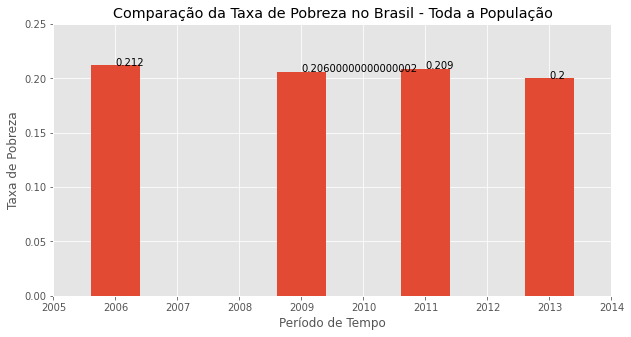

In [132]:
#Como anosMed já foi definido anteriormente, então desconsiderei aqui.
#anosMed = [2006,2009,2011,2013]
comp_y4 = [y4[1596], y4[1597], y4[1598], y4[1599]]

plt.figure(figsize=[10,5])
plt.bar(anosMed,comp_y4)
plt.title("Comparação da Taxa de Pobreza no Brasil - Toda a População")
plt.xlabel("Período de Tempo")
plt.ylabel("Taxa de Pobreza")
plt.axis([2005, 2014, 0, 0.25])
#O código abaixo faz o seguinte:
#Impede que os valores das populações sejam escritos em notação científica.
plt.ticklabel_format(style='plain', axis='y') 
plt.grid(True)
#plt.box(False)

# Colocando os valores das taxas anuais acima de cada barra
for i in range(len(comp_y4)): 
  plt.annotate(str(comp_y4[i]), xy=(anosMed[i],comp_y4[i]))

plt.show()
#Analisando o gráfico abaixo podemos perceber que no último ano pelo qual a
#taxa de pobreza foi medida, ela ficou um pouco abaixo da média de 0.20675
#calculada anteriormente. Sendo assim, podemos concluir que é necessário haver
#mais esforço para tentar diminuir a taxa de pobreza total da população brasileira.
#Entretanto, em uma análise geral, conseguimos identificar que a taxa de pobreza
#da população diminuiu no decorrer dos anos.


#**Interpretação dos Dados**


Após a análise dos resultados, foi possível concluir que a pobreza no Brasil diminuiu no período de 2006 a 2013 considerando a população total do país. Dentre todas as faixas etárias estudadas, somente a taxa de pobreza dos cidadãos com no mínimo 66 anos de idade que aumentou no período. Portanto, o país deve melhorar suas políticas de combate a pobreza para atingir a meta da ONU 2030 visando para tentar erradicá-la.